## Lab Assignment Seven: Sequential Network Architectures

Team: Katie Laird, Cameron Miller, Will Landin

 

Select a dataset that is text. That is, the dataset should be text data. In terms of generalization performance, it is helpful to have a medium sized dataset of similar sized text documents. It is fine to perform binary classification or multi-class classification. The classification should be "many-to-one" sequence classification.

Dataset: https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification/

In [1]:
import numpy as np
import pandas as pd
import re
import gc

### Preparation

[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed). Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). Discuss methods of tokenization in your dataset as well as any decisions to force a specific length of sequence. 

In [2]:
# read in the dataset as a pandas dataframe
df = pd.read_csv("./Datasets/Corona_NLP.csv",encoding='latin1')
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,2/3/2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",2/3/2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,2/3/2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",3/3/2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


#### Clean the tweets text

In [3]:
def clean_tweet(tweet):
    # Remove any non-alphabetic characters except basic punctuation
    tweet = re.sub(r"[^a-zA-Z0-9.,'!? ]", '', tweet)
    # Remove any excess whitespace
    tweet = re.sub(r"\s+", ' ', tweet).strip()
    return tweet

In [4]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_tweet)
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,2/3/2020,TRENDING New Yorkers encounter empty supermark...,Extremely Negative
1,2,44954,"Seattle, WA",2/3/2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,2/3/2020,Panic buying hits NewYork City as anxious shop...,Negative
4,5,44957,"Melbourne, Victoria",3/3/2020,toiletpaper dunnypaper coronavirus coronavirus...,Neutral


In [5]:
print (df.value_counts('Sentiment'))
label_counts = df['Sentiment'].value_counts()

Sentiment
Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: count, dtype: int64


#### One Hot Encode Sentiments

In [6]:
# One Hot Encoding of the sentiments changing Extremely Negative and Negative to 0, Neutral to 1, and Positive and Extremely Positive to 2
df['Sentiment'] = df['Sentiment'].replace('Extremely Negative', 0)
df['Sentiment'] = df['Sentiment'].replace('Negative', 0)
df['Sentiment'] = df['Sentiment'].replace('Neutral', 1)
df['Sentiment'] = df['Sentiment'].replace('Positive', 2)
df['Sentiment'] = df['Sentiment'].replace('Extremely Positive', 2)
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,2/3/2020,TRENDING New Yorkers encounter empty supermark...,0
1,2,44954,"Seattle, WA",2/3/2020,When I couldn't find hand sanitizer at Fred Me...,2
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and love...,2
3,4,44956,Chicagoland,2/3/2020,Panic buying hits NewYork City as anxious shop...,0
4,5,44957,"Melbourne, Victoria",3/3/2020,toiletpaper dunnypaper coronavirus coronavirus...,1


In [7]:
print(df['Sentiment'].value_counts())

Sentiment
2    19592
0    17031
1     8332
Name: count, dtype: int64


Undersample to balance the dataset

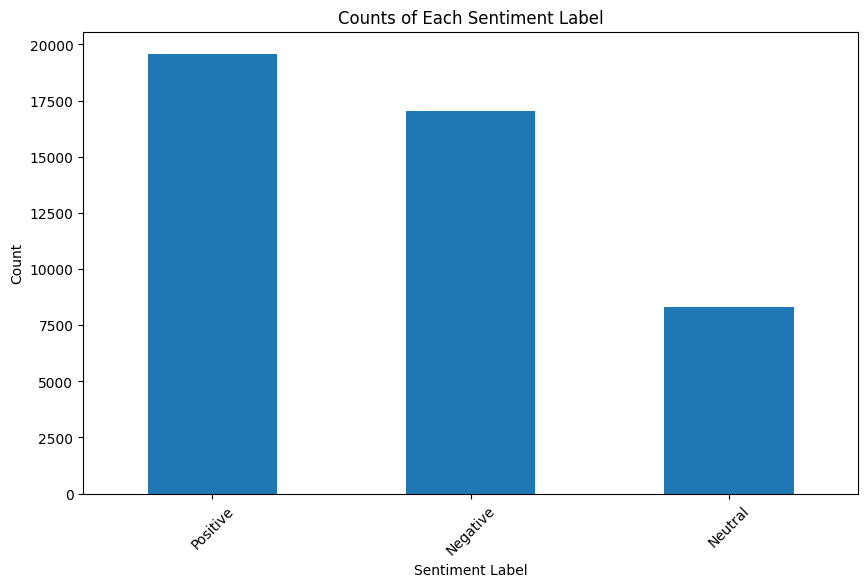

In [101]:
import matplotlib.pyplot as plt

label_counts = df['Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Counts of Each Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Positive', 'Negative', 'Neutral'], rotation=45)
plt.show()

In [9]:
avg_length = np.mean([len(tweet) for tweet in df['OriginalTweet']])
max_length = np.max([len(tweet) for tweet in df['OriginalTweet']])
min_length = np.min([len(tweet) for tweet in df['OriginalTweet']])
print(f"Average length of tweets: {avg_length:.2f} Characters")
print(f"Max length of tweets: {max_length} Characters")
print(f"Min length of tweets: {min_length} Characters")

Average length of tweets: 195.10 Characters
Max length of tweets: 315 Characters
Min length of tweets: 3 Characters


[1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

Our metrics are going to be accurac and precision

[1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your train/test splitting method is a realistic mirroring of how an algorithm would be used in practice. 

2023-12-13 08:43:56.926699: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 08:43:56.926747: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 08:43:56.926778: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 08:43:56.935883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(35964,) (8991,) (35964,) (8991,)
X_train Shape: (35964,) Label Shape: (35964,)
X_test Shape: (8991,) Label Shape: (8991, 3)
Number of Classes: 3


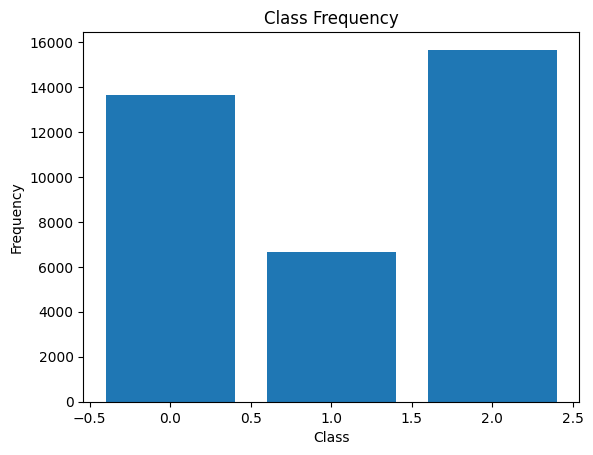

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(df['OriginalTweet'], df['Sentiment'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_test = keras.utils.to_categorical(y_test, 3)

# print some stats of the data
print("X_train Shape:",X_train.shape, "Label Shape:", y_train.shape)
print("X_test Shape:",X_test.shape, "Label Shape:", y_test.shape)
print("Number of Classes:", len(np.unique(y_train)))
plt.bar(np.unique(y_train, return_counts=True)[0], np.unique(y_train, return_counts=True)[1])
plt.title("Class Frequency")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [11]:
y_test[1]

array([0., 0., 1.], dtype=float32)

### Modeling

[3 points] Investigate at least two different sequential network architectures (e.g., a CNN and a Transformer). Alternatively, you may also choose a recurrent network and Transformer network. Be sure to use an embedding layer (try to use a pre-trained embedding, if possible). Adjust one hyper-parameter of each network to potentially improve generalization performance (train a total of at least four models). Visualize the performance of training and validation sets versus the training iterations, showing that the models converged.

#### Creating the embedding layer

In [12]:
%%time
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_TOP_WORDS = None # use entire vocabulary!
MAX_ART_LEN = np.max([len(tweet) for tweet in df['OriginalTweet']]) # maximum number of words in a tweet

#tokenize the text
tokenizer = Tokenizer(num_words=NUM_TOP_WORDS)
tokenizer.fit_on_texts(X_train)
# save as sequences with integers replacing words
sequences = tokenizer.texts_to_sequences(X_train)

word_index = tokenizer.word_index
NUM_TOP_WORDS = len(word_index) if NUM_TOP_WORDS==None else NUM_TOP_WORDS
top_words = min((len(word_index),NUM_TOP_WORDS))
print('Found %s unique tokens. Distilled to %d top words.' % (len(word_index),top_words))

X = pad_sequences(sequences, maxlen=MAX_ART_LEN)
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=MAX_ART_LEN)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=MAX_ART_LEN)


y_ohe = keras.utils.to_categorical(y_train, num_classes=3)
print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', y_ohe.shape)
print(np.max(X))

Found 79381 unique tokens. Distilled to 79381 top words.
Shape of data tensor: (35964, 315)
Shape of label tensor: (35964, 3)
79381
CPU times: user 3 s, sys: 0 ns, total: 3 s
Wall time: 3 s


In [13]:
%%time
EMBED_SIZE = 100
# the embed size should match the file you load glove from
embeddings_index = {}
f = open('./glove/glove.6B.100d.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix.shape[0])

Found 400000 word vectors.
Embedding Shape: (79382, 100) 
 Total words found: 28284 
 Percentage: 35.63024363205764
CPU times: user 6.17 s, sys: 193 ms, total: 6.36 s
Wall time: 6.31 s


In [14]:
from tensorflow.keras.layers import Embedding

# save this embedding now
embedding_layer = Embedding(len(word_index) + 1,
    EMBED_SIZE,
    weights=[embedding_matrix], # here is the embedding getting saved
    input_length=MAX_ART_LEN,
    trainable=False)

#### Creating Sequential Convolutional Neural Network

Here is a function to display the accuracy and loss of a passed in history and yhat of a model

In [83]:
from sklearn.metrics import classification_report

def plot_acc_loss(history, yhat):
    # print the accuracy and loss curves
    plt.figure(figsize=(14,5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Transformer Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Transformer Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.show()

Creating the models

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dropout, GlobalAveragePooling1D
from tensorflow.keras.layers import Subtract, Concatenate
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Embedding

def cnn_seq():
        EMBED_SIZE = 100  # same size as loaded from GLOVE
        sequence_input = Input(shape=(MAX_ART_LEN,), dtype='int32')
        embedded_sequences = embedding_layer(sequence_input) # from previous embedding
        
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(embedded_sequences)
        x = MaxPooling1D(5)(x)
        x = Dropout(0.2)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Dropout(0.2)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Flatten()(x)
        x = Dropout(0.2)(x)
        x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
        preds = Dense(3, activation='softmax', kernel_initializer='glorot_uniform')(x)

        model = Model(sequence_input, preds)

        model.compile(loss='categorical_crossentropy', 
                optimizer='rmsprop',
                metrics=['acc'])
        return model
    
model_cnn1 = cnn_seq()
history_c1 = model_cnn1.fit(X_train, y_ohe, epochs=10, batch_size=128, validation_split=0.2)
yhat_c1 = np.round(model_cnn1.predict(X_test))

2023-12-13 08:44:08.609204: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79087 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4e:00.0, compute capability: 8.0


Epoch 1/10


2023-12-13 08:44:10.572689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8905
2023-12-13 08:44:10.651958: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-13 08:44:10.795471: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-13 08:44:11.541821: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f28b4a91c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-13 08:44:11.541849: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2023-12-13 08:44:11.546360: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-13 08:44:11.630411: I ./tensorflow/compiler/jit/device_compil

225/225 [==============================] - 4s 6ms/step - loss: 1.0736 - acc: 0.4318 - val_loss: 1.0570 - val_acc: 0.4370
Epoch 2/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0486 - acc: 0.4348 - val_loss: 1.0441 - val_acc: 0.4370
Epoch 3/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0427 - acc: 0.4348 - val_loss: 1.0425 - val_acc: 0.4370
Epoch 4/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0421 - acc: 0.4348 - val_loss: 1.0424 - val_acc: 0.4370
Epoch 5/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0420 - acc: 0.4348 - val_loss: 1.0424 - val_acc: 0.4370
Epoch 6/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0421 - acc: 0.4348 - val_loss: 1.0424 - val_acc: 0.4370
Epoch 7/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0420 - acc: 0.4348 - val_loss: 1.0424 - val_acc: 0.4370
Epoch 8/10
225/225 [==============================] - 1s 5ms/step - loss: 1.0420 - acc:

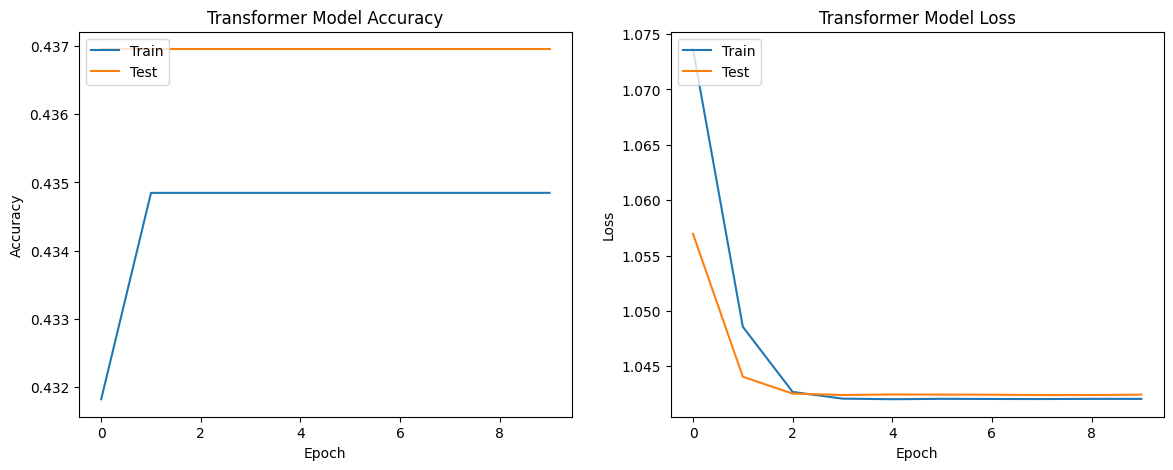

In [84]:
plot_acc_loss(history_c1, yhat_c1)

In [18]:
def cnn_seq():
        EMBED_SIZE = 100  # same size as loaded from GLOVE
        sequence_input = Input(shape=(MAX_ART_LEN,), dtype='int32')
        embedded_sequences = embedding_layer(sequence_input) # from previous embedding
        
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(embedded_sequences)
        x = MaxPooling1D(5)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Flatten()(x)
        x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
        preds = Dense(3, activation='softmax', kernel_initializer='glorot_uniform')(x)

        model = Model(sequence_input, preds)

        model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['acc'])
        return model
    
model_cnn2 = cnn_seq()
history_c2 = model_cnn2.fit(X_train, y_ohe, epochs=10, batch_size=128, validation_split=0.2)
yhat_c2 = np.round(model_cnn2.predict(X_test))

Epoch 1/10
225/225 [==============================] - 3s 5ms/step - loss: 1.0763 - acc: 0.4343 - val_loss: 1.0600 - val_acc: 0.4370
Epoch 2/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0519 - acc: 0.4348 - val_loss: 1.0468 - val_acc: 0.4370
Epoch 3/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0445 - acc: 0.4348 - val_loss: 1.0434 - val_acc: 0.4370
Epoch 4/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0426 - acc: 0.4348 - val_loss: 1.0426 - val_acc: 0.4370
Epoch 5/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0421 - acc: 0.4348 - val_loss: 1.0425 - val_acc: 0.4370
Epoch 6/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0421 - acc: 0.4348 - val_loss: 1.0424 - val_acc: 0.4370
Epoch 7/10
225/225 [==============================] - 1s 4ms/step - loss: 1.0420 - acc: 0.4348 - val_loss: 1.0424 - val_acc: 0.4370
Epoch 8/10
225/225 [==============================] - 1s 4ms/step - loss: 1.

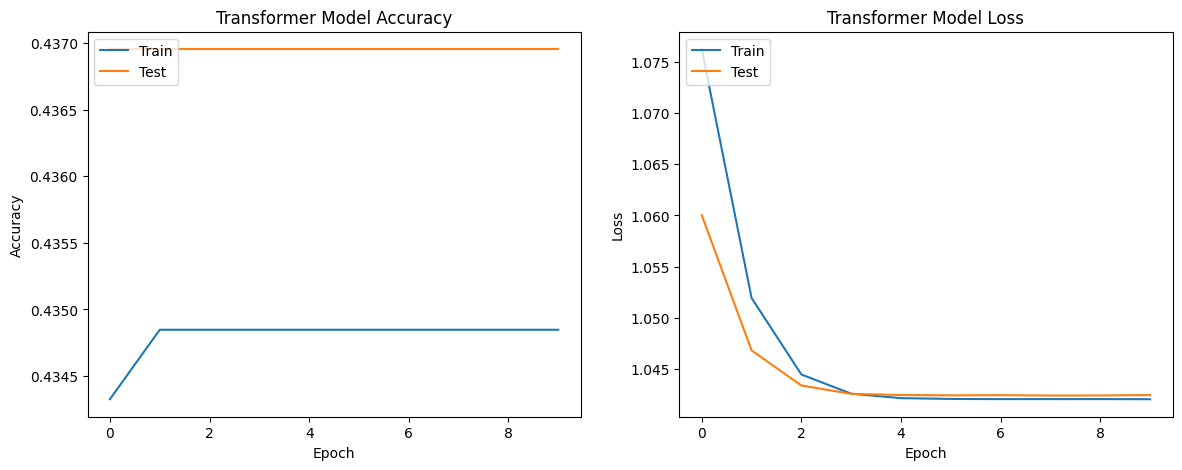

In [85]:
plot_acc_loss(history_c2, yhat_c2)

In [20]:
def cnn_seq_noGlove():
        EMBED_SIZE = 100  # same size as loaded from GLOVE
        sequence_input = Input(shape=(MAX_ART_LEN,), dtype='int32')
        embedded_sequences = Embedding(top_words,
                                      EMBED_SIZE,
                                      input_length=MAX_ART_LEN)(sequence_input) # from previous embedding
        
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(embedded_sequences)
        x = MaxPooling1D(5)(x)
        x = Dropout(0.2)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Dropout(0.2)(x)
        x = Conv1D(128, 5, activation='relu', kernel_initializer='he_uniform')(x)
        x = MaxPooling1D(5)(x)
        x = Flatten()(x)
        x = Dropout(0.2)(x)
        x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
        preds = Dense(3, activation='softmax', kernel_initializer='glorot_uniform')(x)

        model = Model(sequence_input, preds)

        model.compile(loss='categorical_crossentropy', 
                optimizer='rmsprop',
                metrics=['acc'])
        return model
    
model_cnn_ng = cnn_seq_noGlove()
history_cng = model_cnn_ng.fit(X_train, y_ohe, epochs=10, batch_size=128, validation_split=0.2)
yhat_cng = np.round(model_cnn_ng.predict(X_test))

Epoch 1/10
225/225 [==============================] - 18s 73ms/step - loss: 1.0463 - acc: 0.4304 - val_loss: 1.0487 - val_acc: 0.4370
Epoch 2/10
225/225 [==============================] - 6s 27ms/step - loss: 1.0434 - acc: 0.4346 - val_loss: 1.0454 - val_acc: 0.4370
Epoch 3/10
225/225 [==============================] - 3s 14ms/step - loss: 1.0428 - acc: 0.4348 - val_loss: 1.0425 - val_acc: 0.4370
Epoch 4/10
225/225 [==============================] - 3s 12ms/step - loss: 1.0428 - acc: 0.4348 - val_loss: 1.0427 - val_acc: 0.4370
Epoch 5/10
225/225 [==============================] - 2s 9ms/step - loss: 1.0425 - acc: 0.4347 - val_loss: 1.0441 - val_acc: 0.4370
Epoch 6/10
225/225 [==============================] - 2s 9ms/step - loss: 1.0424 - acc: 0.4348 - val_loss: 1.0425 - val_acc: 0.4370
Epoch 7/10
225/225 [==============================] - 2s 8ms/step - loss: 1.0425 - acc: 0.4348 - val_loss: 1.0426 - val_acc: 0.4370
Epoch 8/10
225/225 [==============================] - 2s 11ms/step - lo

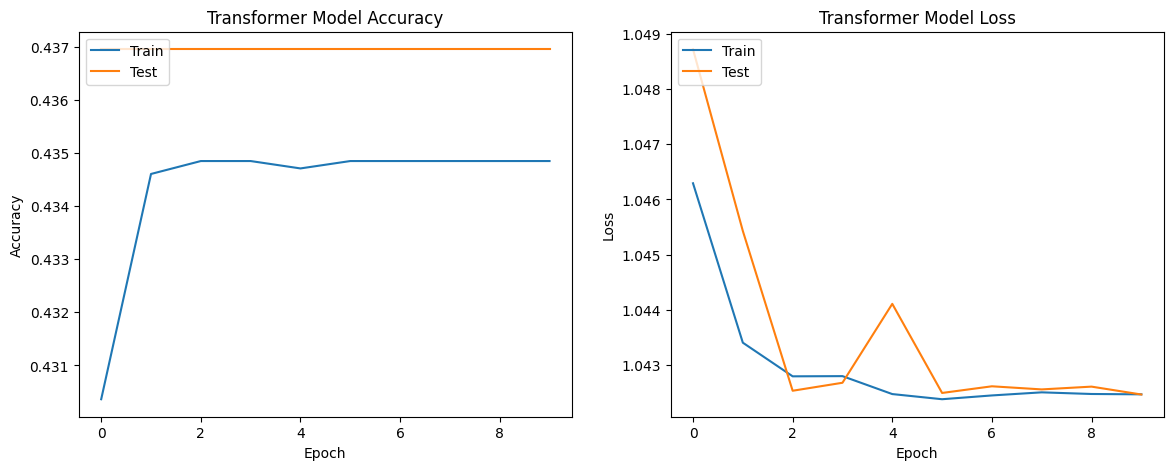

In [86]:
plot_acc_loss(history_cng, yhat_cng)

#### Creating Sequential Transformer

Updated plotting function to include area under the curve

In [88]:
def plot_acc_loss(history, yhat):
    # print the accuracy and loss curves
    plt.figure(figsize=(14,5))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Transformer Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Transformer Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(1, 3, 3)
    plt.plot(history.history['val_auc'])
    plt.title('Transformer Model AUC')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')

    
    plt.show()
    
    print(classification_report(y_test, yhat))

In [23]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Layer
import tensorflow as tf

# The transformer architecture 
class TransformerBlock(Layer): # inherit from Keras Layer
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super().__init__()
        # setup the model heads and feedforward network
        self.att = MultiHeadAttention(num_heads=num_heads, 
                                      key_dim=embed_dim)
        
        # make a two layer network that processes the attention
        self.ffn = Sequential()
        self.ffn.add( Dense(ff_dim, activation='relu') )
        self.ffn.add( Dense(embed_dim) )
        
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        # apply the layers as needed (similar to PyTorch)
        
        # get the attention output from multi heads
        # Using same inpout here is self-attention
        # call inputs are (query, value, key) 
        # if only two inputs given, value and key are assumed the same
        attn_output = self.att(inputs, inputs)
        
        # create residual output, with attention
        out1 = self.layernorm1(inputs + attn_output)
        
        # apply dropout if training
        out1 = self.dropout1(out1, training=training)
        
        # place through feed forward after layer norm
        ffn_output = self.ffn(out1)
        out2 = self.layernorm2(out1 + ffn_output)
        
        # apply dropout if training
        out2 = self.dropout2(out2, training=training)
        #return the residual from Dense layer
        return out2
    
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        # create two embeddings 
        # one for processing the tokens (words)
        self.token_emb = Embedding(input_dim=vocab_size, 
                                   output_dim=embed_dim)
        # another embedding for processing the position
        self.pos_emb = Embedding(input_dim=maxlen, 
                                 output_dim=embed_dim)

    def call(self, x):
        # create a static position measure (input)
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        # positions now goes from 0 to 500 (for IMdB) by 1
        positions = self.pos_emb(positions)# embed these positions
        x = self.token_emb(x) # embed the tokens
        return x + positions # add embeddngs to get final embedding

In [24]:
embed_dim = 32  # Embedding size for each token
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

def transformer_seq(X_train, X_test, y_train, y_test, epochs, num_heads, dropout, neurons):
    inputs = Input(shape=(X_train.shape[1],))
    x = TokenAndPositionEmbedding(X_train.shape[1], len(tokenizer.word_index) + 1, embed_dim)(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    x = Dense(neurons, activation='relu')(x)
    x = Dropout(dropout)(x)
    outputs = Dense(3, activation='sigmoid',
                kernel_initializer='glorot_uniform')(x)
    xformer = Model(inputs=inputs, outputs=outputs)
    xformer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['acc','AUC'])
    history = xformer.fit(
        X_train, y_train, batch_size=64, epochs=epochs,
        validation_data=(X_test, y_test),
    )

    yhat = np.round(xformer.predict(X_test))

    return history, yhat, xformer

In [25]:
# Transformer Model 1
history_t1, yhat_t1, model_t1 = transformer_seq(X_train, X_test, y_ohe, y_test, 10, 2, 0.2, 64)

Epoch 1/10
562/562 [==============================] - 37s 57ms/step - loss: 0.9359 - acc: 0.5157 - auc: 0.7031 - val_loss: 0.5901 - val_acc: 0.7807 - val_auc: 0.8877
Epoch 2/10
562/562 [==============================] - 9s 15ms/step - loss: 0.4473 - acc: 0.8480 - auc: 0.9212 - val_loss: 0.4438 - val_acc: 0.8560 - val_auc: 0.9295
Epoch 3/10
562/562 [==============================] - 7s 12ms/step - loss: 0.2705 - acc: 0.9133 - auc: 0.9639 - val_loss: 0.5712 - val_acc: 0.8416 - val_auc: 0.9238
Epoch 4/10
562/562 [==============================] - 6s 11ms/step - loss: 0.1732 - acc: 0.9432 - auc: 0.9839 - val_loss: 0.6839 - val_acc: 0.8329 - val_auc: 0.9184
Epoch 5/10
562/562 [==============================] - 6s 11ms/step - loss: 0.1144 - acc: 0.9617 - auc: 0.9926 - val_loss: 0.8778 - val_acc: 0.8073 - val_auc: 0.9077
Epoch 6/10
562/562 [==============================] - 6s 11ms/step - loss: 0.0727 - acc: 0.9768 - auc: 0.9964 - val_loss: 1.0250 - val_acc: 0.7693 - val_auc: 0.8914
Epoch 7/1

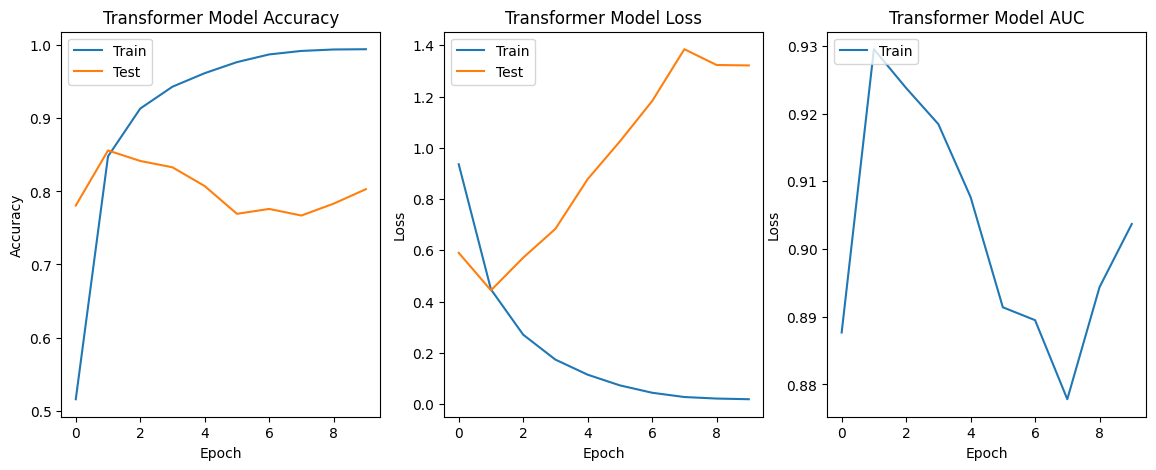

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      3383
           1       0.70      0.81      0.75      1670
           2       0.77      0.89      0.83      3938

   micro avg       0.75      0.85      0.80      8991
   macro avg       0.74      0.84      0.79      8991
weighted avg       0.75      0.85      0.80      8991
 samples avg       0.79      0.85      0.81      8991



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
plot_acc_loss(history_t1, yhat_t1)

In [27]:
# Transformer 2
history_t2, yhat_t2, model_t2 = transformer_seq(X_train, X_test, y_ohe, y_test, 10, 3, 0.4, 128)

Epoch 1/10
562/562 [==============================] - 26s 41ms/step - loss: 0.9927 - acc: 0.4666 - auc: 0.6681 - val_loss: 0.6740 - val_acc: 0.7215 - val_auc: 0.8616
Epoch 2/10
562/562 [==============================] - 7s 13ms/step - loss: 0.4931 - acc: 0.8310 - auc: 0.9221 - val_loss: 0.4439 - val_acc: 0.8543 - val_auc: 0.9418
Epoch 3/10
562/562 [==============================] - 6s 11ms/step - loss: 0.2841 - acc: 0.9102 - auc: 0.9711 - val_loss: 0.4981 - val_acc: 0.8552 - val_auc: 0.9401
Epoch 4/10
562/562 [==============================] - 5s 10ms/step - loss: 0.1746 - acc: 0.9454 - auc: 0.9874 - val_loss: 0.7437 - val_acc: 0.8259 - val_auc: 0.9216
Epoch 5/10
562/562 [==============================] - 5s 10ms/step - loss: 0.1111 - acc: 0.9647 - auc: 0.9939 - val_loss: 0.8841 - val_acc: 0.8156 - val_auc: 0.9206
Epoch 6/10
562/562 [==============================] - 5s 9ms/step - loss: 0.0729 - acc: 0.9786 - auc: 0.9968 - val_loss: 1.0463 - val_acc: 0.7814 - val_auc: 0.9029
Epoch 7/10

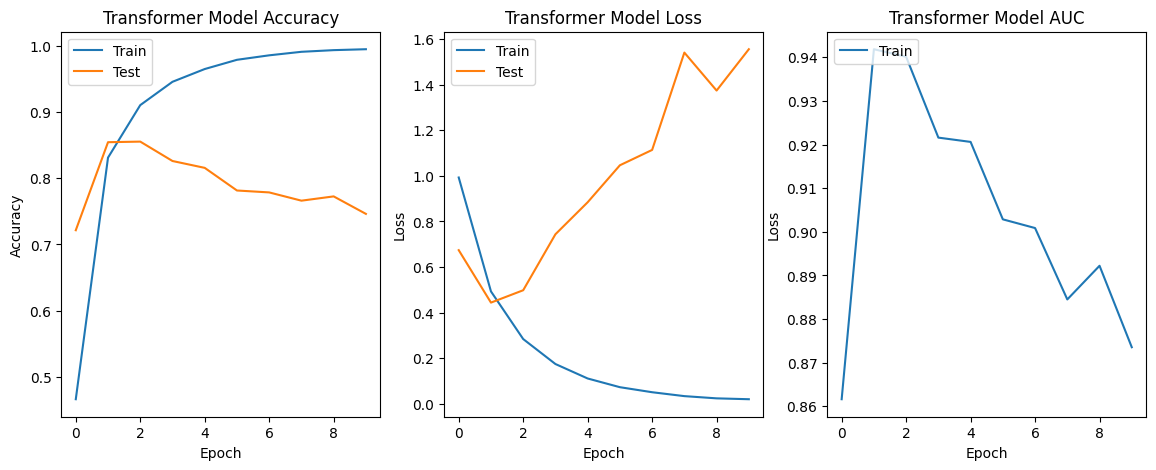

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      3383
           1       0.48      0.84      0.61      1670
           2       0.76      0.84      0.80      3938

   micro avg       0.70      0.79      0.74      8991
   macro avg       0.68      0.80      0.72      8991
weighted avg       0.73      0.79      0.75      8991
 samples avg       0.73      0.79      0.75      8991



In [80]:
plot_acc_loss(history_t2, yhat_t2)

In [94]:
def transformer_seq_double(X_train, X_test, y_train, y_test, epochs, num_heads, dropout, neurons):
    inputs = Input(shape=(X_train.shape[1],))
    x = TokenAndPositionEmbedding(X_train.shape[1], len(tokenizer.word_index) + 1, embed_dim)(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x) # Second Block
    
    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    x = Dense(neurons, activation='relu')(x)
    x = Dropout(dropout)(x)
    outputs = Dense(3, activation='sigmoid',
                kernel_initializer='glorot_uniform')(x)

    xformer = Model(inputs=inputs, outputs=outputs)

    xformer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['acc', 'AUC'])

    history = xformer.fit(
        X_train, y_train, batch_size=64, epochs=epochs,
        validation_data=(X_test, y_test),
    )

    yhat = np.round(xformer.predict(X_test))

    return history, yhat, xformer

In [98]:
# Transformer 3
history_t3, yhat_t3, model_t3 = transformer_seq_double(X_train, X_test, y_ohe, y_test, 10, 6, 0.4, 128)

Epoch 1/10
562/562 [==============================] - 59s 96ms/step - loss: 1.0648 - acc: 0.4243 - auc: 0.5664 - val_loss: 1.0443 - val_acc: 0.4380 - val_auc: 0.6261
Epoch 2/10
562/562 [==============================] - 44s 78ms/step - loss: 1.0465 - acc: 0.4314 - auc: 0.5717 - val_loss: 1.0428 - val_acc: 0.4380 - val_auc: 0.6331
Epoch 3/10
562/562 [==============================] - 44s 79ms/step - loss: 1.0278 - acc: 0.4437 - auc: 0.5962 - val_loss: 1.0400 - val_acc: 0.4379 - val_auc: 0.6422
Epoch 4/10
562/562 [==============================] - 44s 78ms/step - loss: 0.8960 - acc: 0.5802 - auc: 0.6618 - val_loss: 0.8070 - val_acc: 0.6478 - val_auc: 0.7878
Epoch 5/10
562/562 [==============================] - 44s 78ms/step - loss: 0.7671 - acc: 0.6780 - auc: 0.7255 - val_loss: 0.7013 - val_acc: 0.7248 - val_auc: 0.8196
Epoch 6/10
562/562 [==============================] - 44s 78ms/step - loss: 0.6069 - acc: 0.7778 - auc: 0.7929 - val_loss: 0.6851 - val_acc: 0.7544 - val_auc: 0.8575
Epoc

[2 points] Use the method of train/test splitting and evaluation criteria that you argued for at the beginning of the lab. Visualize the results of all the models you trained.  Use proper statistical comparison techniques to determine which method(s) is (are) superior.  

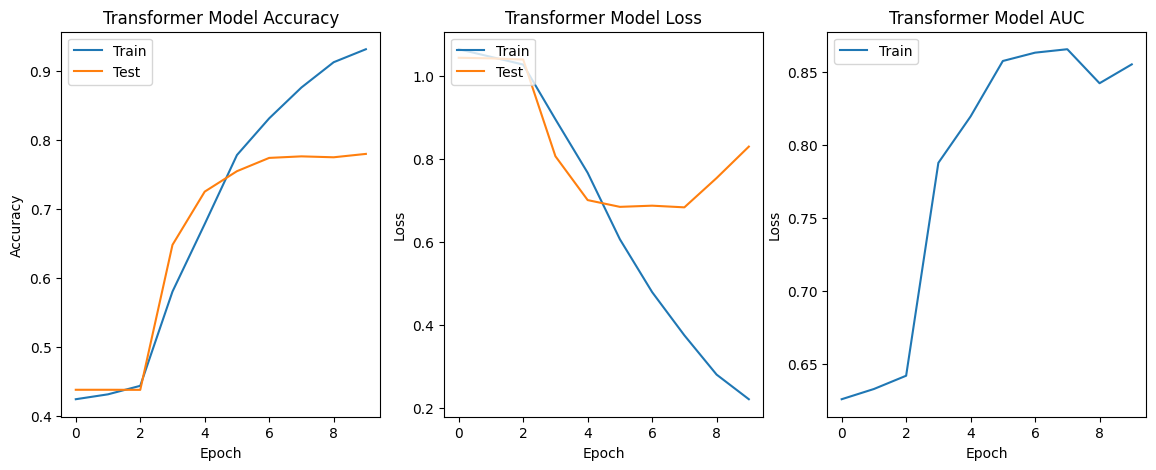

              precision    recall  f1-score   support

           0       0.43      0.93      0.59      3383
           1       0.28      0.85      0.43      1670
           2       0.78      0.86      0.82      3938

   micro avg       0.48      0.89      0.62      8991
   macro avg       0.50      0.88      0.61      8991
weighted avg       0.56      0.89      0.66      8991
 samples avg       0.58      0.89      0.66      8991



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
plot_acc_loss(history_t3, yhat_t3)

In [100]:
from statsmodels.stats.contingency_tables import mcnemar

correct_pred1 = np.argmax(yhat_t1, axis=1) == np.argmax(y_test, axis=1)
correct_pred2 = np.argmax(yhat_t2, axis=1) == np.argmax(y_test, axis=1)
correct_pred3 = np.argmax(yhat_t3, axis=1) == np.argmax(y_test, axis=1)


def calculate_mcnemar(correct1, correct2):
    # Count the number of times each model was correct/incorrect
    n00 = n01 = n10 = n11 = 0
    for i in range(len(correct1)):
        if correct1[i] and correct2[i]:
            n11 += 1
        elif correct1[i] and not correct2[i]:
            n10 += 1
        elif not correct1[i] and correct2[i]:
            n01 += 1
        elif not correct1[i] and not correct2[i]:
            n00 += 1
    
    # Construct the contingency table
    table = [[n11, n10],
             [n01, n00]]
    
    # Perform McNemar's test
    result = mcnemar(table, exact=False, correction=True)  # Use correction for small sample sizes
    return result

# Calculate McNemar's test
result1_2 = calculate_mcnemar(correct_pred1, correct_pred2)
result1_3 = calculate_mcnemar(correct_pred1, correct_pred3)
result2_3 = calculate_mcnemar(correct_pred2, correct_pred3)

print(f'Transformer 1 vs Transformer 2: stat={result1_2.statistic}, p-value={result1_2.pvalue:.3f}')
print(f'Transformer 1 vs Double Transformer: stat={result1_3.statistic}, p-value={result1_3.pvalue:.3f}')
print(f'Transformer 2 vs Double Transformer: stat={result2_3.statistic}, p-value={result2_3.pvalue:.3f}')

Transformer 1 vs Transformer 2: stat=99.76962962962963, p-value=0.000
Transformer 1 vs Double Transformer: stat=1908.623040752351, p-value=0.000
Transformer 2 vs Double Transformer: stat=1299.3863203050523, p-value=0.000


### Exceptional Work

[1 points] Use the pre-trained ConceptNet Numberbatch embedding and compare to pre-trained GloVe. Which method is better for your specific application? 

In [41]:
EMBED_SIZE = 100
class GloveTokenAndPositionEmbedding(Layer):
    def __init__(self):
        super().__init__()
        # create two embeddings 
        # one for processing the tokens, pretrained (words)
        self.token_emb = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)
        
        # another embedding for processing the position
        self.pos_emb = Embedding(MAX_ART_LEN, 
                                 EMBED_SIZE, 
                                 input_length=MAX_ART_LEN,
                                 trainable=True
                                )

    def call(self, x):
        # create a static position measure (input)
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        # positions now goes from 0 to 500 (for IMdB) by 1
        positions = self.pos_emb(positions)# embed these positions
        x = self.token_emb(x) # embed the tokens
        return x + positions # add embeddngs to get final embedding

In [42]:
embed_dim = 100  # Embedding size for each token
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

def transformer_glove(X_train, X_test, y_train, y_test, epochs, num_heads, dropout, neurons):
    inputs = Input(shape=(X_train.shape[1],))
    x = GloveTokenAndPositionEmbedding()(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    
    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    x = Dense(neurons, activation='relu')(x)
    x = Dropout(dropout)(x)
    outputs = Dense(3, activation='sigmoid',
                kernel_initializer='glorot_uniform')(x)
    xformer = Model(inputs=inputs, outputs=outputs)
    xformer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['acc','AUC'])
    history = xformer.fit(
        X_train, y_train, batch_size=64, epochs=epochs,
        validation_data=(X_test, y_test),
    )

    yhat = np.round(xformer.predict(X_test))

    return history, yhat, xformer

In [43]:
history_tgl, yhat_tgl, model_tgl = transformer_glove(X_train, X_test, y_ohe, y_test, 20, 3, 0.4, 128)

Epoch 1/20
562/562 [==============================] - 10s 12ms/step - loss: 0.8285 - acc: 0.6193 - auc: 0.7818 - val_loss: 0.6909 - val_acc: 0.7107 - val_auc: 0.8648
Epoch 2/20
562/562 [==============================] - 6s 11ms/step - loss: 0.6854 - acc: 0.7237 - auc: 0.8479 - val_loss: 0.6512 - val_acc: 0.7361 - val_auc: 0.8765
Epoch 3/20
562/562 [==============================] - 6s 11ms/step - loss: 0.6441 - acc: 0.7454 - auc: 0.8628 - val_loss: 0.6320 - val_acc: 0.7504 - val_auc: 0.8727
Epoch 4/20
562/562 [==============================] - 6s 11ms/step - loss: 0.6207 - acc: 0.7577 - auc: 0.8711 - val_loss: 0.6037 - val_acc: 0.7614 - val_auc: 0.8850
Epoch 5/20
562/562 [==============================] - 6s 11ms/step - loss: 0.6021 - acc: 0.7642 - auc: 0.8758 - val_loss: 0.6194 - val_acc: 0.7594 - val_auc: 0.8911
Epoch 6/20
562/562 [==============================] - 6s 11ms/step - loss: 0.5903 - acc: 0.7705 - auc: 0.8818 - val_loss: 0.6034 - val_acc: 0.7657 - val_auc: 0.8985
Epoch 7/2

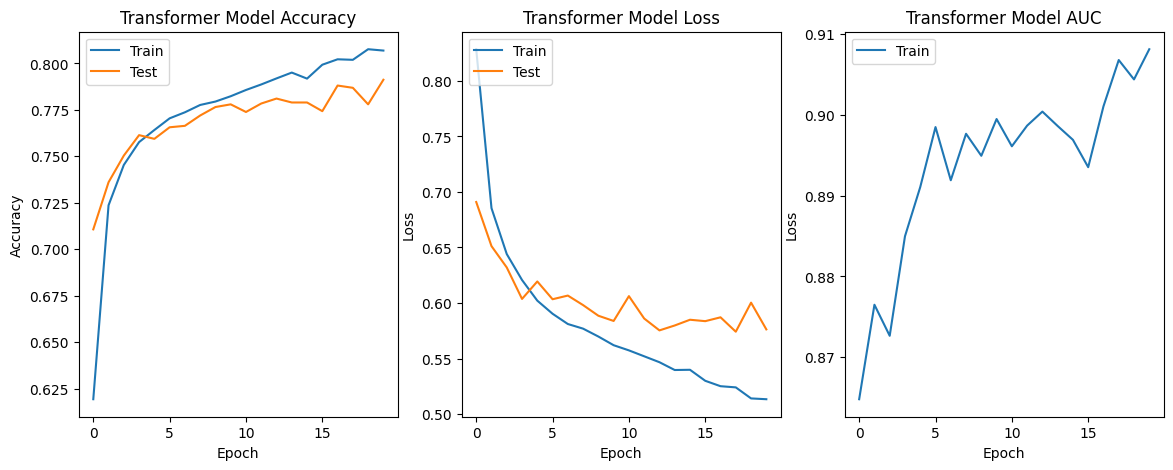

              precision    recall  f1-score   support

           0       0.67      0.91      0.77      3383
           1       0.68      0.76      0.72      1670
           2       0.61      0.92      0.73      3938

   micro avg       0.64      0.89      0.74      8991
   macro avg       0.65      0.87      0.74      8991
weighted avg       0.64      0.89      0.74      8991
 samples avg       0.71      0.89      0.77      8991



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
plot_acc_loss(history_tgl, yhat_tgl)

### Conceptnet embedding

In [67]:
EMBED_SIZE = 300
embed_dim = 300  # Embedding size for each token
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

# the embed size should match the file you load glove from
embeddings_index = {}
f = open('./numberbatch/numberbatch-en.txt')
# save key/array pairs of the embeddings
#  the key of the dictionary is the word, the array is the embedding
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

# now fill in the matrix, using the ordering from the
#  keras word tokenizer from before
found_words = 0
embedding_matrix_cn = np.zeros((len(word_index) + 1, EMBED_SIZE))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be ALL-ZEROS
        embedding_matrix_cn[i] = embedding_vector
        found_words = found_words+1

print("Embedding Shape:",embedding_matrix_cn.shape, "\n",
      "Total words found:",found_words, "\n",
      "Percentage:",100*found_words/embedding_matrix_cn.shape[0])

Found 516783 word vectors.
Embedding Shape: (79382, 300) 
 Total words found: 25268 
 Percentage: 31.83089365347308


In [68]:
class CNTokenAndPositionEmbedding(Layer):
    def __init__(self):
        super().__init__()
        # create two embeddings 
        # one for processing the tokens, pretrained (words)
        self.token_emb = Embedding(len(word_index) + 1,
                            EMBED_SIZE,
                            weights=[embedding_matrix_cn],# here is the embedding getting saved
                            input_length=MAX_ART_LEN,
                            trainable=False)
        
        # another embedding for processing the position
        self.pos_emb = Embedding(MAX_ART_LEN, 
                                 EMBED_SIZE, 
                                 input_length=MAX_ART_LEN,
                                 trainable=True
                                )

    def call(self, x):
        # create a static position measure (input)
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        # positions now goes from 0 to 500 (for IMdB) by 1
        positions = self.pos_emb(positions)# embed these positions
        x = self.token_emb(x) # embed the tokens
        return x + positions # add embeddngs to get final embedding

In [69]:
def transformer_conceptnet(X_train, X_test, y_train, y_test, epochs, num_heads, dropout, neurons):
    inputs = Input(shape=(X_train.shape[1],))
    x = CNTokenAndPositionEmbedding()(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    
    x = GlobalAveragePooling1D()(x)
    x = Dropout(dropout)(x)
    x = Dense(neurons, activation='relu')(x)
    x = Dropout(dropout)(x)
    outputs = Dense(3, activation='sigmoid',
                kernel_initializer='glorot_uniform')(x)
    xformer = Model(inputs=inputs, outputs=outputs)
    xformer.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['acc','AUC'])
    history = xformer.fit(
        X_train, y_train, batch_size=64, epochs=epochs,
        validation_data=(X_test, y_test),
    )

    yhat = np.round(xformer.predict(X_test))

    return history, yhat, xformer

In [70]:
history_tcn, yhat_tcn, model_tcn = transformer_conceptnet(X_train, X_test, y_ohe, y_test, 20, 3, 0.4, 128)

Epoch 1/20
562/562 [==============================] - 18s 25ms/step - loss: 0.8869 - acc: 0.5640 - auc: 0.7187 - val_loss: 0.6342 - val_acc: 0.7501 - val_auc: 0.8685
Epoch 2/20
562/562 [==============================] - 14s 25ms/step - loss: 0.5979 - acc: 0.7727 - auc: 0.8483 - val_loss: 0.5491 - val_acc: 0.7897 - val_auc: 0.9066
Epoch 3/20
562/562 [==============================] - 14s 25ms/step - loss: 0.5564 - acc: 0.7913 - auc: 0.8488 - val_loss: 0.5428 - val_acc: 0.8008 - val_auc: 0.8991
Epoch 4/20
562/562 [==============================] - 14s 25ms/step - loss: 0.5290 - acc: 0.8036 - auc: 0.8485 - val_loss: 0.5207 - val_acc: 0.8022 - val_auc: 0.8991
Epoch 5/20
562/562 [==============================] - 14s 25ms/step - loss: 0.5099 - acc: 0.8101 - auc: 0.8527 - val_loss: 0.5058 - val_acc: 0.8148 - val_auc: 0.8959
Epoch 6/20
562/562 [==============================] - 14s 25ms/step - loss: 0.5047 - acc: 0.8140 - auc: 0.8458 - val_loss: 0.5184 - val_acc: 0.8052 - val_auc: 0.9073
Epoc

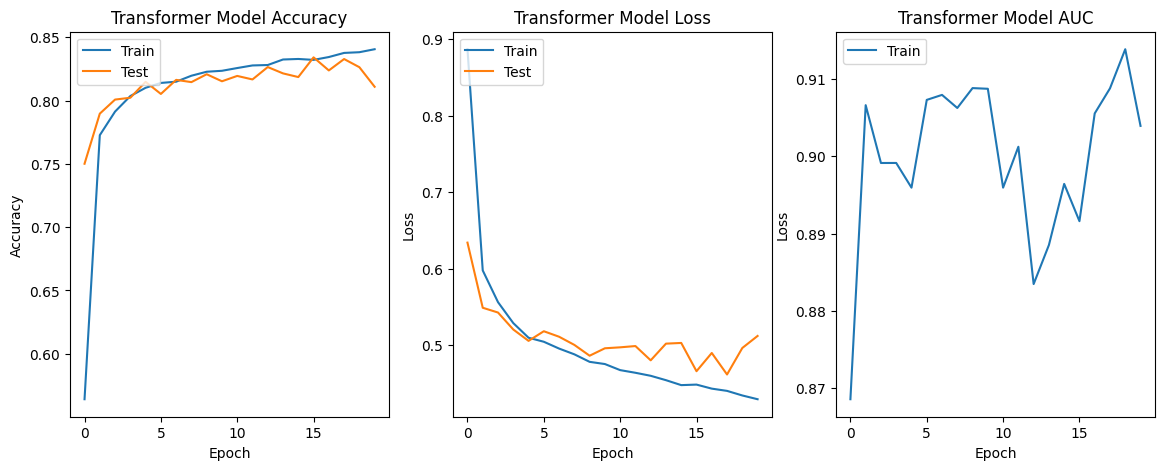

              precision    recall  f1-score   support

           0       0.59      0.96      0.73      3383
           1       0.35      0.91      0.51      1670
           2       0.56      0.98      0.71      3938

   micro avg       0.52      0.96      0.67      8991
   macro avg       0.50      0.95      0.65      8991
weighted avg       0.53      0.96      0.68      8991
 samples avg       0.59      0.96      0.71      8991



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
plot_acc_loss(history_tcn, yhat_tcn)

In [72]:
correct_pred1 = np.argmax(yhat_tgl, axis=1) == np.argmax(y_test, axis=1)
correct_pred2 = np.argmax(yhat_tcn, axis=1) == np.argmax(y_test, axis=1)

result = calculate_mcnemar(correct_pred1, correct_pred2)

print(f'Transformer Glove Embed vs Transformer Conceptnet Embed: stat={result.statistic}, p-value={result.pvalue:.3f}')

Transformer Glove Embed vs Transformer Conceptnet Embed: stat=820.3237687366167, p-value=0.000
